# 6.4 Supervised Machine Learning 

## This notebook contains: 

### 1. Import of libraries and data
### 2. Data cleaning
### 3. Data prep for regression analysis
### 4. Regression analysis

#### 1. Import of libraries and data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
#Ensuring matplotlib display of graphs
%matplotlib inline

In [9]:
path = 'C:/Users/C SaiVishwanath/Documents/CF/Data Immersion/Achievement 6'

In [11]:
df = pd.read_csv(os.path.join(path, '02_Data', 'Prepared', '130425_mass_shoot_merged_derived.csv'), index_col = False, encoding='latin1')

#### 2. Data cleaning

In [15]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Incident_ID', 'Date',
       'Year', 'Month', 'State', 'City', 'Victims_Killed', 'Victims_Injured',
       'Suspects_Killed', 'Suspects_Injured', 'Suspects_Arrested',
       'Year_Month_State', 'Handguns_Sold', 'Long_Guns_Sold',
       'Total_Guns_Sold', 'State_ID', 'State_y', 'County', 'Lat', 'Long',
       'Population', 'Shootings_County', 'Shootings_State',
       'Total_Harmed_Victims', 'Any_Suspect_Arrested'],
      dtype='object')

In [17]:
df.shape

(64528, 28)

In [23]:
#Missing value check
df.isnull().sum()

Unnamed: 0.2              0
Unnamed: 0.1              0
Unnamed: 0                0
Incident_ID               0
Date                      0
Year                      0
Month                     0
State                     0
City                      0
Victims_Killed            0
Victims_Injured           0
Suspects_Killed           0
Suspects_Injured          0
Suspects_Arrested         0
Year_Month_State          0
Handguns_Sold           233
Long_Guns_Sold          233
Total_Guns_Sold         233
State_ID                  0
State_y                   0
County                    0
Lat                       0
Long                      0
Population                0
Shootings_County          0
Shootings_State           0
Total_Harmed_Victims      0
Any_Suspect_Arrested      0
dtype: int64

In [25]:
#Duplicate check
dups = df.duplicated()
dups.shape

(64528,)

In [27]:
#No dups

C:\Users\Alejandra\AppData\Local\Temp\ipykernel_20620\456808408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Shootings_County'], bins=25)


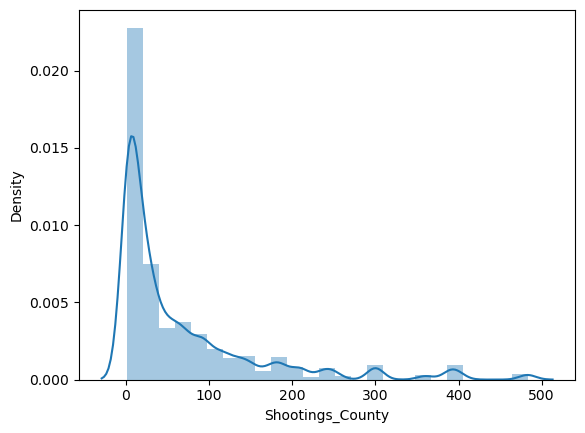

C:\Users\Alejandra\AppData\Local\Temp\ipykernel_20620\456808408.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Guns_Sold'], bins=25)


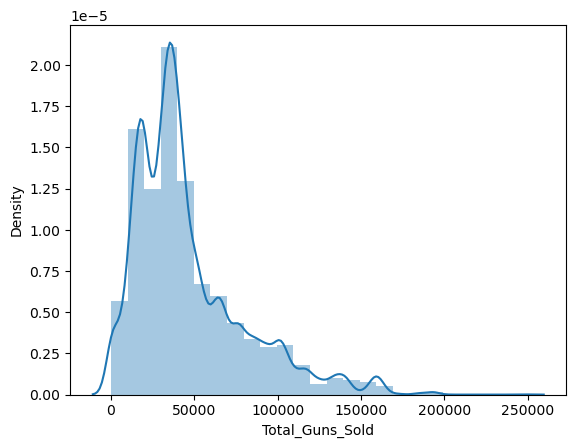

In [29]:
#Extreme value check
sns.distplot(df['Shootings_County'], bins=25)
plt.show()
sns.distplot(df['Total_Guns_Sold'], bins=25)
plt.show()

In [55]:
#Checking mean, median, and max 'Shootings_County'
df['Shootings_County'].mean()

66.31728861889412

In [41]:
df['Shootings_County'].median()

27.0

In [43]:
df['Shootings_County'].max()

483

In [45]:
#Checking mean, median, and max 'Total_Guns_Sold'
df['Total_Guns_Sold'].mean()

46158.0100629909

In [51]:
df['Total_Guns_Sold'].median()

37121.0

In [53]:
df['Shootings_County'].max()

483

#### 3. Data prep for regression analysis

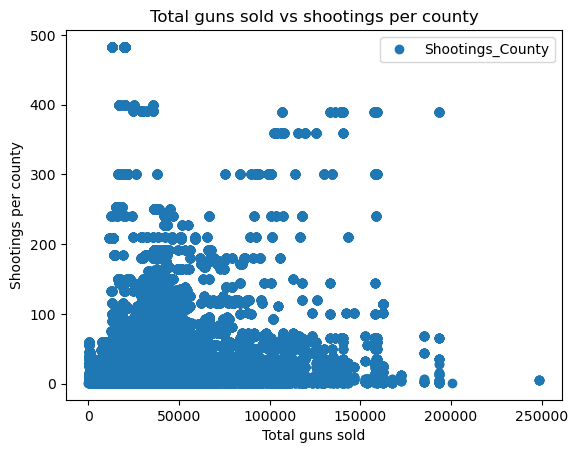

In [58]:
#Scatterplot with matplotlib
df.plot(x = 'Total_Guns_Sold', y='Shootings_County',style='o') 
plt.title('Total guns sold vs shootings per county')  
plt.xlabel('Total guns sold')  
plt.ylabel('Shootings per county')  
plt.show()

In [121]:
#Reshaping variables to NumPy arrays & putting them into separate objects

X = df['Total_Guns_Sold'].values.reshape(-1,1)
y = df['Shootings_County'].values.reshape(-1,1)

In [123]:
X

array([[    0.],
       [    0.],
       [    0.],
       ...,
       [43058.],
       [43058.],
       [43058.]])

In [125]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### 4. Regression analysis

In [128]:
#Creating regression object
regression = LinearRegression() 

In [130]:
#Fit the regression object onto training set
regression.fit(X_train, y_train)

LinearRegression()

#### NOTE: Values that were previously left as NaN will be turned to 0 in order to be able to perform regression analysis

In [133]:
pd.reset_option('display.max_rows')

In [135]:
df['Total_Guns_Sold'].value_counts(dropna=False)

Total_Guns_Sold
19683.0    379
36074.0    374
19895.0    316
13714.0    247
32244.0    242
          ... 
7945.0       1
64036.0      1
22228.0      1
98865.0      1
14298.0      1
Name: count, Length: 2065, dtype: int64

In [137]:
(df['Total_Guns_Sold'] == 0).sum()

235

In [139]:
(df['Handguns_Sold'] == 0).sum()

235

In [141]:
(df['Long_Guns_Sold'] == 0).sum()

253

#### NOTE: 233 NaN values will be turned to 0 on gun sales columns

In [144]:
#Changing NaN to 0
df['Total_Guns_Sold'] = df['Total_Guns_Sold'].fillna(0)
df['Handguns_Sold'] = df['Handguns_Sold'].fillna(0)
df['Long_Guns_Sold'] = df['Long_Guns_Sold'].fillna(0)

In [146]:
df['Total_Guns_Sold'].value_counts(dropna=False)

Total_Guns_Sold
19683.0    379
36074.0    374
19895.0    316
13714.0    247
32244.0    242
          ... 
7945.0       1
64036.0      1
22228.0      1
98865.0      1
14298.0      1
Name: count, Length: 2065, dtype: int64

In [148]:
df['Handguns_Sold'].value_counts(dropna=False)

Handguns_Sold
11438.0    375
22154.0    374
9558.0     316
6578.0     247
21746.0    242
          ... 
43134.0      1
2492.0       1
19127.0      1
14930.0      1
12618.0      1
Name: count, Length: 2052, dtype: int64

In [150]:
df['Long_Guns_Sold'].value_counts(dropna=False)

Long_Guns_Sold
8246.0     375
13921.0    374
10337.0    316
0.0        253
7136.0     247
          ... 
14035.0      1
11512.0      1
8193.0       1
10286.0      1
7957.0       1
Name: count, Length: 2011, dtype: int64

#### Resuming regression analysis

In [153]:
#Fit the regression object onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [155]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

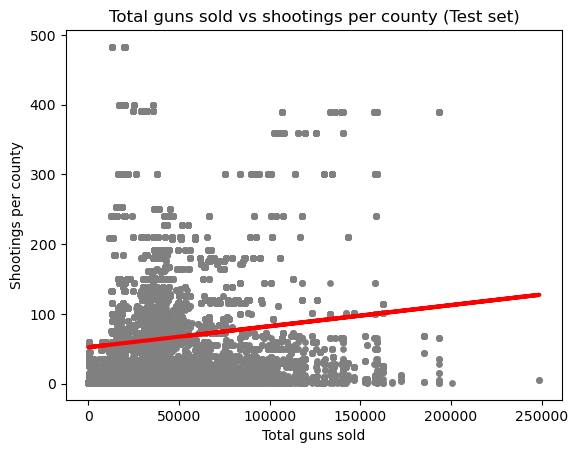

In [157]:
#Plot that shows regression line from model on test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total guns sold vs shootings per county (Test set)')
plot_test.xlabel('Total guns sold')
plot_test.ylabel('Shootings per county')
plot_test.show()


In [159]:
#Create objects containing model summary statistics

rmse = mean_squared_error(y_test, y_predicted) #Mean sq. error
r2 = r2_score(y_test, y_predicted) #R2 score

In [161]:
#Print summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00030225]]
Mean squared error:  8478.955698286405
R2 score:  0.008235250528972893


#### Interpretation

- Slope is negligibly positive: Correlation is weakly positive.
- High MSE : Prediction is not accurate.
- R2=0.0082 : Less thabn 1% of the variation in the dependant variable is explained by the model.
- Conclusion: Model is not a good fit for the data. 

In [166]:
y_predicted

array([[68.51839982],
       [75.35778976],
       [68.73360424],
       ...,
       [68.17594672],
       [63.27218756],
       [54.84566503]])

In [168]:
#Dataframe comparing actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,40,68.518400
1,2,75.357790
2,228,68.733604
3,180,63.895736
4,133,61.113192
5,7,77.704787
6,36,73.770657
7,240,87.815164
8,14,58.210350
9,120,63.873067


In [170]:
#Predicting X_train
y_predicted_train = regression.predict(X_train)

In [172]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [174]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00030225]]
Mean squared error:  8305.600411412324
R2 score:  0.012014413738490881


#### Interpretation

- High MSE in relation to range : Prediction is not accurate.
- R2=0.0120 : 1.2% of the variation in the dependant variable is explained by the model.
- Conclusion: Slightly better than the training model, but still not a good fit.

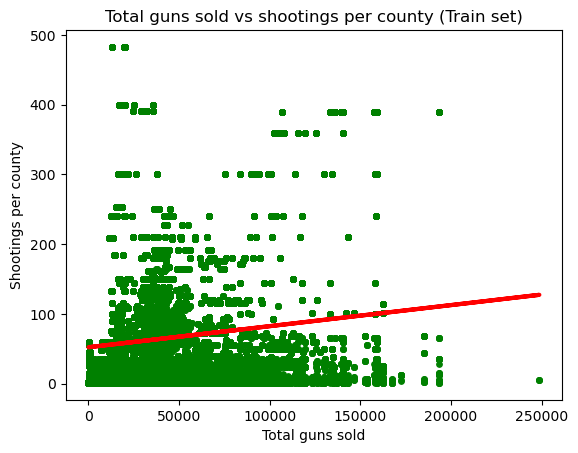

In [179]:
#Visualizing results
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Total guns sold vs shootings per county (Train set)')
plot_test.xlabel('Total guns sold')
plot_test.ylabel('Shootings per county')
plot_test.show()

#### Conclusions


##### Model performance

The model shows a very small slope and a low R² score (~0.012), meaning it explains just over 1% of the variance in the data. While the model does provide predictions somewhat close to the actual values in magnitude, it fails to capture meaningful patterns or variability in the target variable.

The predicted values are clustered around a narrow range, suggesting the model may be underfitting. It assumes a mostly flat trend and doesn’t adapt well to fluctuations in actual outcomes.

##### About bias 

It's possible that bias in the dataset impacts the model’s performance. For instance if the data is imbalanced (e.g., some counties are overrepresented), if there are omitted variables (e.g., socioeconomic factors, urban vs. rural contexts) as we know there are since this dataset only considers mass shooting events and gun sales, or if the gun sales data isn't accurately capturing the nuances that lead to shootings--which it is likely that it is not. 

In [189]:
df.to_csv(os.path.join(path, '02_Data', 'Prepared', '130425_mass_shoot_merged_derived_ver2.csv'))